<a href="https://colab.research.google.com/github/malakanton/pet_projects/blob/main/Covid19_cases_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6>Исследование развития пандемии COVID-19</font>

## Описание проекта

Основная задача проекта: Выявить закономерности по которым развивалась пандемия covid-19 с начала 2020 и как на показатели заболеваемости и смертности влияла вакцинация.

Данные:

- Основной датасет - Объединенные данные о случаях заболевания Covid и вакцинации по всему миру. Источник: https://www.kaggle.com/datasets/kunwarakash/covid-cases-and-vaccination-data?resource=download

- Дополнительные датасеты
 - Население по странам 2020. Источник: https://www.kaggle.com/datasets/tanuprabhu/population-by-country-2020
 - Тесты на COVID-19 по дням. Источник: https://ourworldindata.org/grapher/daily-covid-19-tests-smoothed-7-day
 - Датасет, в котором хранятся букванные коды для каждой страны Источник: https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv




План проекта:

- Ознакомиться с данными
- Сделать предобработку (удалить лишние данные/сделать проверку на дубликаты/соеденить таблицы/добавить дополнительные метрики)
- Провести исследовательский анализ данных:
 - Рассмотреть общий мировой тренд,
 - Рассмотреть топ-15 стран с наиболее высокими показателями метрик.
- Проверить гипотезы:
 - Вакцинация улучшила ситуацию, сократив количество сметрных кейсов.
 - Чем выше средний возраст населения страны, тем выше смертность от COVID-19,
 - Жители городов в большей степени подвержены заболеванию,

- Общий вывод


# Загрузка данных 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#!pip install matplotlib --upgrade;
!pip install matplotlib==3.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! gdown 1vvH9_zPZRbmkXlFkez7Y6lQ0ovLq_LOV

Downloading...
From: https://drive.google.com/uc?id=1vvH9_zPZRbmkXlFkez7Y6lQ0ovLq_LOV
To: /content/covid_cases__vaccination.csv
100% 15.6M/15.6M [00:00<00:00, 192MB/s]


In [ ]:
! gdown 11w0Mfv8ogdhKs_6O-Gbqj9Pf4sQN2yIO

Downloading...
From: https://drive.google.com/uc?id=11w0Mfv8ogdhKs_6O-Gbqj9Pf4sQN2yIO
To: /content/population_by_country_2020.csv
100% 15.9k/15.9k [00:00<00:00, 16.3MB/s]


In [ ]:
! gdown 13GPHF7n5yBp02yR6wg71VuYL1dgoIhZp

Downloading...
From: https://drive.google.com/uc?id=13GPHF7n5yBp02yR6wg71VuYL1dgoIhZp
To: /content/daily-covid-19-tests-smoothed-7-day.csv
100% 4.61M/4.61M [00:00<00:00, 234MB/s]


Заранее скорректируем настройку отображения данных. Установим:
- Отображение знаков после запятой - чтобы удобнее было работать с цифрами
- Максимально отображаемое кол-во колонок в датафрейме (если колонок много по умолчанию в широких таблицах он отображает с многоточием)
- Размер графиков, чтобы не прописывать каждый раз вручную

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 100
sns.set(rc={'figure.figsize':(18,10)}, style="darkgrid")

# Знакомство с данными

### Загрузка основного датасета

In [ ]:
df = pd.read_csv('/content/covid_cases__vaccination.csv', index_col=[0])

In [ ]:
df.head()

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,total_vaccinations,total_boosters,daily_vaccinations,daily_people_vaccinated
0,afghanistan,2020-01-22,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,afghanistan,2020-01-23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,afghanistan,2020-01-24,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,afghanistan,2020-01-25,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,afghanistan,2020-01-26,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199017 entries, 0 to 199016
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  199017 non-null  object 
 1   date                     199017 non-null  object 
 2   total_cases              199017 non-null  float64
 3   total_deaths             199017 non-null  float64
 4   daily_cases              199017 non-null  float64
 5   daily_deaths             199017 non-null  float64
 6   fully_vaccinated         199017 non-null  float64
 7   total_vaccinations       199017 non-null  float64
 8   total_boosters           199017 non-null  float64
 9   daily_vaccinations       199017 non-null  float64
 10  daily_people_vaccinated  199017 non-null  float64
dtypes: float64(9), object(2)
memory usage: 18.2+ MB


Нас интересуют колонки с данными:

 * country - страна, 
 * date - дата, 
 * total_cases - всего случаев заболеваний в стране к этому дню
 * total_deaths - всего случаев смерти в стране к этому дню
 * daily_cases - всего случаев заболевания в стране в этот день, 
 * daily_deaths - всего случаев смерти в стране в этот день,
 * fully_vaccinated - полностью вакцинированных людей в стране к этому дню,  
 * daily_peoplevaccinated - вакцинированных людей в день.

 
 Избавимся от лишних колонок. 
 
 Сменим тип данных в колонке с датой на DateTime и добавим колонку год и первый день месяца.

In [ ]:
df = df.drop(['total_vaccinations','total_boosters','daily_vaccinations'], axis=1)
df.head()
df.shape

(199017, 8)

In [ ]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df['year'] = df.date.dt.year
df['month'] = df['date'].to_numpy().astype('datetime64[M]')

df.head()

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,daily_people_vaccinated,year,month
0,afghanistan,2020-01-22,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01
1,afghanistan,2020-01-23,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01
2,afghanistan,2020-01-24,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01
3,afghanistan,2020-01-25,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01
4,afghanistan,2020-01-26,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01


### Загрузка дополнительного датасета с информацией о населении стран

In [ ]:
df_population = pd.read_csv('/content/population_by_country_2020.csv')

In [ ]:
df_population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.000,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.000,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.000,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.000,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.000,3.6,23,35 %,2.83 %


In [ ]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


Нас интересуют колонки с данными:

* Сountry - страна
* Population - население по состоянию на 2020 год - переименуем в 'population_2020'
* Med. Age  - средний возраст -  переименуем в 'med_age'
* Urban Pop % - % городского населения - переименуем в 'urban_rate'

Избавимся от лишних колонок. 


Также приведем названия стран к нижнему регистру



In [ ]:
df_population = df_population.drop(columns=['Yearly Change','Net Change','Density (P/Km²)',
                                            'Land Area (Km²)','Migrants (net)','Fert. Rate','World Share'])
df_population.columns = ['country', 'population_2020', 'med_age', 'urban_rate']
df_population['country'] = df_population.country.str.lower()

In [ ]:
df_population.shape

(235, 4)

In [ ]:
df_population['med_age']= df_population.med_age.replace({'N.A.':np.nan}).astype('float')

Изменим тип столбца 'urban_rate' на числовой для дальнейшего удобства при работе с данными

In [ ]:
df_population['urban_rate'] = df_population.urban_rate.apply(lambda x: x.split()[0])
df_population['urban_rate'] = df_population.urban_rate.replace({'N.A.':np.nan}).astype('float')
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          235 non-null    object 
 1   population_2020  235 non-null    int64  
 2   med_age          201 non-null    float64
 3   urban_rate       222 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.5+ KB


### Загрузка дополнительного датасета с информацией о тестах


In [ ]:
df_tests_daily = pd.read_csv('/content/daily-covid-19-tests-smoothed-7-day.csv')

In [ ]:
df_tests_daily.head()

,Entity,Code,Day,new_tests_7day_smoothed,142752-annotations
0,Afghanistan,AFG,2022-02-05,1301,NaN
1,Afghanistan,AFG,2022-02-06,1301,NaN
2,Afghanistan,AFG,2022-02-07,1301,NaN
3,Afghanistan,AFG,2022-02-08,1301,NaN
4,Afghanistan,AFG,2022-02-09,1301,NaN


In [ ]:
df_tests_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103963 entries, 0 to 103962
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Entity                   103963 non-null  object
 1   Code                     103963 non-null  object
 2   Day                      103963 non-null  object
 3   new_tests_7day_smoothed  103963 non-null  int64 
 4   142752-annotations       97299 non-null   object
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [ ]:
len(df_tests_daily['Code'].unique())

183

Нас интересуют колонки с данными: 

* Entity - страна - переименуем в 'country' как и в других датасетах
* Day - дата - переименуем в 'date'
* new_tests_7day_smoothed - скользящее средне количества проведенных тестов за 7 дней - переименуем в 'number_of_tests'

Нам также пригодятся данные о кодировке стран, но мы возьмем их из дополнительного ДС, содержащего большее количество кодировок.

Избавимся от лишних колонок. 

Сменим тип колонки с датой на DateTime для дальнейшего удобства работы
Также приведем названия стран к нижнему регистру.

In [ ]:
df_tests_daily = df_tests_daily.drop(columns=['Code','142752-annotations'])
df_tests_daily.columns=['country','date','number_of_tests']
df_tests_daily['date'] = pd.to_datetime(df_tests_daily.date, format='%Y-%m-%d')
df_tests_daily['country'] = df_tests_daily.country.str.lower()
df_tests_daily.head()

,country,date,number_of_tests
0,afghanistan,2022-02-05,1301
1,afghanistan,2022-02-06,1301
2,afghanistan,2022-02-07,1301
3,afghanistan,2022-02-08,1301
4,afghanistan,2022-02-09,1301


### Загрузка дополнительного датасета с трехзначной буквенной маркировка стран

In [ ]:
df_iso_codes = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')

In [ ]:
df_iso_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [ ]:
df_iso_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              256 non-null    object
 1   Alpha-2 code         256 non-null    object
 2   Alpha-3 code         256 non-null    object
 3   Numeric code         256 non-null    object
 4   Latitude (average)   256 non-null    object
 5   Longitude (average)  256 non-null    object
dtypes: object(6)
memory usage: 12.1+ KB


In [ ]:
len(df_iso_codes['Alpha-3 code'].unique())

244

Нас интересуют колонки с данными:

* Country - страна - переименуем в 'country' как и в других датасетах
* Alpha-3 - 3-значный буквенный код - переименуем в 'alpha_code'

Избавимся от лишних колонок.

Приведем названия стран к нижнему регистру. 

В столбце с кодами избавимся от ковычек.

In [ ]:
df_iso_codes = df_iso_codes.drop(columns=['Alpha-2 code','Numeric code','Latitude (average)','Longitude (average)'])
df_iso_codes.columns = ['country', 'alpha_code']
df_iso_codes.shape

(256, 2)

In [ ]:
df_iso_codes['country'] = df_iso_codes['country'].str.lower()
df_iso_codes['alpha_code'] = df_iso_codes['alpha_code'].apply(lambda x: x.split('"')[1])
df_iso_codes.head()

,country,alpha_code
0,afghanistan,AFG
1,albania,ALB
2,algeria,DZA
3,american samoa,ASM
4,andorra,AND


# Предобработка данных

#### Дубликаты

Посмотрим, есть ли у нас дубликаты, и избавимся от них

In [ ]:
df.duplicated().sum()

197

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_population.duplicated().sum()

0

In [ ]:
df_tests_daily.duplicated().sum()

0

Избавимся от неявных дубликатов

In [ ]:
df_population = df_population.replace({'czech republic (czechia)': 'czechia', 
                                       'state of palestine': 'palestine',
                                       'cabo verde': 'cape verde'})

Также в  ДС по-разному отражены океания, и колонии Англии и Франции. Но в целом, они малы, так что ими можно пренебречь

#### Объединение данных

Добавим данные из трех датасетов в основной

In [ ]:
df = df.merge(df_iso_codes, on='country', how='left')
df = df.merge(df_population, on='country', how='left')
df = df.merge(df_tests_daily, on=['country','date'], how='left')

In [ ]:
df.head()

,country,date,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,daily_people_vaccinated,year,month,alpha_code,population_2020,med_age,urban_rate,number_of_tests
0,afghanistan,2020-01-22,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01,AFG,39074280.000,18.000,25.000,NaN
1,afghanistan,2020-01-23,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01,AFG,39074280.000,18.000,25.000,NaN
2,afghanistan,2020-01-24,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01,AFG,39074280.000,18.000,25.000,NaN
3,afghanistan,2020-01-25,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01,AFG,39074280.000,18.000,25.000,NaN
4,afghanistan,2020-01-26,0.000,0.000,0.000,0.000,0.000,0.000,2020,2020-01-01,AFG,39074280.000,18.000,25.000,NaN


In [ ]:
df.shape

(198820, 15)

In [ ]:
df.isna().mean()

country                   0.000
date                      0.000
total_cases               0.000
total_deaths              0.000
daily_cases               0.000
daily_deaths              0.000
fully_vaccinated          0.000
daily_people_vaccinated   0.000
year                      0.000
month                     0.000
alpha_code                0.119
population_2020           0.087
med_age                   0.158
urban_rate                0.128
number_of_tests           0.478
dtype: float64

#### Даты наблюдений

Определим период времени, за который у нас имеются данные в основном датасете

In [ ]:
print('Начало наблюдений в основном датасете:', df.date.dt.date.min())
print('Конец наблюдений  в основном датасете:', df.date.dt.date.max())

Начало наблюдений в основном датасете: 2020-01-22
Конец наблюдений  в основном датасете: 2022-07-10


Определим период времени, за который у нас имеются данные о тестах

In [ ]:
print('Начало наблюдений:', df_tests_daily.date.min())
print('Конец наблюдений:',df_tests_daily.date.max())

Начало наблюдений: 2020-01-08 00:00:00
Конец наблюдений: 2022-06-23 00:00:00


Данные о количесвте тестов только до 2022-06-23, так что удалим все записи после этой даты

In [ ]:
df[(df.date > '2022-06-23') & (~df.number_of_tests.isna()) ]
df = df[df.date < '2022-06-23']
df.shape

(194949, 15)

#### Пропуски в данных

Посмотрим на страны, по которым отсутствуют некоторые данные.

In [ ]:
df.isna().mean()

country                   0.000
date                      0.000
total_cases               0.000
total_deaths              0.000
daily_cases               0.000
daily_deaths              0.000
fully_vaccinated          0.000
daily_people_vaccinated   0.000
year                      0.000
month                     0.000
alpha_code                0.119
population_2020           0.087
med_age                   0.158
urban_rate                0.128
number_of_tests           0.467
dtype: float64

Страны, где отсутствуют данные о среднем возрасте населения:

In [ ]:
df[df.med_age.isna()]['country'].unique()

array(['andorra', 'anguilla', 'antarctica',
       'bonaire sint eustatius and saba', 'british overseas',
       'cook islands', "cote d'ivoire", 'curacao',
       'democratic republic of congo', 'dominica', 'falkland islands',
       'france overseas', 'gibraltar', 'greenland', 'guernsey',
       'holy see', 'isle of man', 'jersey', 'kosovo', 'liechtenstein',
       'marshall islands', 'monaco', 'montserrat', 'palau',
       'saint kitts and nevis', 'saint vincent and the grenadines',
       'san marino', 'sao tome and principe', 'timor', 'oceania', 'niue',
       'northern cyprus', 'tuvalu'], dtype=object)

Страны, где отсутствует 3-х значный код:

In [ ]:
df[df.alpha_code.isna()]['country'].unique()

array(['bonaire sint eustatius and saba', 'british overseas',
       "cote d'ivoire", 'curacao', 'czechia',
       'democratic republic of congo', 'eswatini', 'falkland islands',
       'france overseas', 'holy see', 'iran', 'kosovo', 'laos',
       'micronesia', 'moldova', 'north korea', 'north macedonia',
       'palestine', 'syria', 'tanzania', 'timor', 'oceania',
       'northern cyprus'], dtype=object)

Страны, где отсутствуют данные о населении:

In [ ]:
df[df.population_2020.isna()]['country'].unique()

array(['antarctica', 'bonaire sint eustatius and saba',
       'british overseas', "cote d'ivoire", 'curacao',
       'democratic republic of congo', 'france overseas', 'guernsey',
       'jersey', 'kosovo', 'saint kitts and nevis',
       'saint vincent and the grenadines', 'sao tome and principe',
       'timor', 'oceania', 'northern cyprus'], dtype=object)

Как мы видим, пропуски есть только у очень маленьких стран. Ими можно пренебречь. 

Страны, где отсутствуют данные о тестах:

In [ ]:
total_tests_in_countries=df.groupby(['country'])['number_of_tests']\
.agg('sum')\
.reset_index()\
.sort_values(by='number_of_tests')

total_tests_in_countries_zero = total_tests_in_countries[total_tests_in_countries.number_of_tests == 0]['country'].to_list()
total_tests_in_countries_zero

['kyrgyzstan',
 'san marino',
 'samoa',
 'cape verde',
 'papua new guinea',
 'cook islands',
 'oceania',
 'northern cyprus',
 'niue',
 'new caledonia',
 'montserrat',
 'montenegro',
 'monaco',
 'micronesia',
 'eritrea',
 'liberia',
 'falkland islands',
 'kiribati',
 'jersey',
 'france overseas',
 'isle of man',
 'honduras',
 'holy see',
 'greenland',
 'brunei',
 'british overseas',
 'guernsey',
 'benin',
 'tonga',
 'turkmenistan',
 'aruba',
 'sudan',
 'tuvalu',
 'uzbekistan',
 'seychelles',
 'tajikistan',
 'venezuela',
 'algeria',
 'solomon islands',
 'bonaire sint eustatius and saba',
 'antarctica']

Проверим, на сколько эти страны для нас критичны в контексте общего населения планеты.

In [ ]:
df_population[df_population['country'].isin(total_tests_in_countries_zero)]['population_2020'].sum()/df_population['population_2020'].sum()

0.02759229467945918

Хотя в общем объеме записей пропуски сотавляют почти 50%. Не смотря на это, мы понимаем, что они имеют меньший вес по сравнению с крупными странами, и их население составляет меньше 3%. Ими можно пренебречь.

#### Обработка исленных данных

Посмотрим ближе на численные данные

In [ ]:
df.describe()

,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,daily_people_vaccinated,year,population_2020,med_age,urban_rate,number_of_tests
count,194949.000,194949.000,194949.000,194949.000,194949.000,194949.000,194949.000,177979.000,164124.000,170032.000,103831.000
mean,918244.184,15376.370,3239.918,34.558,4075445.623,24000.896,2020.829,42536244.721,30.646,59.258,212960.482
std,4098389.176,61905.821,18975.704,173.168,34109671.797,193320.932,0.737,160918937.146,9.028,22.457,1437802.823
min,0.000,0.000,-349116.000,-1918.000,0.000,0.000,2020.000,801.000,15.000,10.000,0.000
25%,1288.000,17.000,0.000,0.000,0.000,0.000,2020.000,1882408.000,22.000,43.000,1815.000
50%,26162.000,365.000,42.000,0.000,0.000,7.000,2021.000,8678517.000,30.000,61.000,8026.000
75%,277974.000,4634.000,662.000,8.000,0.000,2819.000,2021.000,29225196.000,39.000,79.000,39151.500
max,86729841.000,1015092.000,1383890.000,11447.000,1259184000.000,6785334.000,2022.000,1440297825.000,48.000,98.000,14769984.000


In [ ]:
len(df[df.daily_cases<0])

157

In [ ]:
len(df[df.daily_deaths<0])

189

В столбцах 'daily_deaths' и 'daily_cases' встречаются отрицательные значения. Их не много и скорее всего это связано с тем, что при занесении в базу использовался дефис, так что мы возьмем значения по модулю.


In [ ]:
df['daily_cases'] = np.abs(df.daily_cases)
df['daily_deaths'] = np.abs(df.daily_deaths)

In [ ]:
df.describe()

,total_cases,total_deaths,daily_cases,daily_deaths,fully_vaccinated,daily_people_vaccinated,year,population_2020,med_age,urban_rate,number_of_tests
count,194949.000,194949.000,194949.000,194949.000,194949.000,194949.000,194949.000,177979.000,164124.000,170032.000,103831.000
mean,918244.184,15376.370,3248.141,34.624,4075445.623,24000.896,2020.829,42536244.721,30.646,59.258,212960.482
std,4098389.176,61905.821,18974.298,173.155,34109671.797,193320.932,0.737,160918937.146,9.028,22.457,1437802.823
min,0.000,0.000,0.000,0.000,0.000,0.000,2020.000,801.000,15.000,10.000,0.000
25%,1288.000,17.000,0.000,0.000,0.000,0.000,2020.000,1882408.000,22.000,43.000,1815.000
50%,26162.000,365.000,42.000,0.000,0.000,7.000,2021.000,8678517.000,30.000,61.000,8026.000
75%,277974.000,4634.000,663.000,8.000,0.000,2819.000,2021.000,29225196.000,39.000,79.000,39151.500
max,86729841.000,1015092.000,1383890.000,11447.000,1259184000.000,6785334.000,2022.000,1440297825.000,48.000,98.000,14769984.000


#### Добавление метрик

Добавим колонку с соотношением смертей к количеству случаев. Этот показатель может свидетельствовать о качестве медицинской системы/влиянии вакцины на болезнь.

В связи с тем, что у нас имеются записи 'daily_cases' с нулевыми значениями, по умолчанию примем их за 0


In [ ]:
df['deaths_to_cases'] = df.daily_deaths.div(df.daily_cases)
df.loc[~np.isfinite(df['deaths_to_cases']), 'deaths_to_cases'] = 0

Соотношение смертных случаев к населению страны.

In [ ]:
df['deaths_to_population'] = df.total_deaths / df.population_2020

Соотношение случаев к населению страны. 

In [ ]:
df['cases_to_population'] = df.total_cases / df.population_2020

Соотношение числа вакцинированных к общей численности населения. 

In [ ]:
df['vaccinated_share'] = df.fully_vaccinated / df.population_2020

Соотношение количества тестов и количества выявленных случаев. Чем оно меньше, тем, соответственно, больше проводилось профилактических тестов. 

In [ ]:
df['cases_to_tests'] = df.daily_cases / df.number_of_tests

# Общее исследование по всему миру

####Общая корреляция признаков относительно друг друга

Посмотрим на общую корреляцию признаков относительно друг друга

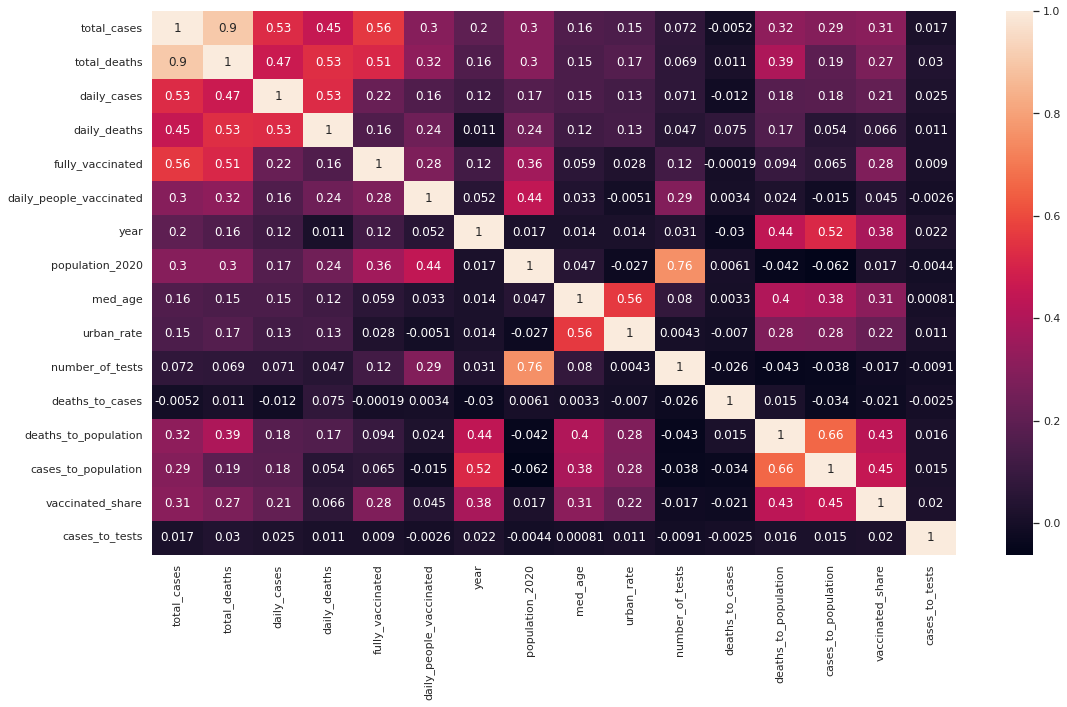

In [ ]:
sns.heatmap(df.corr(), annot=True);

Все линейный связи сильны на очевидно связанных признаках, таких как:
- смертельные исходы - количество заболевших
- количество тестов - население страны
- смертельные исходы - доля заболеваемости среди населения,
- количество заболевших - ежедневное количество заболеваний, 
- количество вакциняций - общее количество заболеваний, 
- уровень урбанизации - средний возраст населения. 


Никаких особенностей не обнаружено.

#### Влияние вакцинации на COVID-19


Посмотрим на общую тенденцию заболеваний за весь период и влияние вакцинации на нее.


In [ ]:
fig = px.bar(data_frame=df.groupby('month')[['daily_cases','daily_people_vaccinated']].sum(), 
       color='daily_people_vaccinated',
       labels={'month':'Месяц и год', 'value':'Число случаев заражения', 'daily_people_vaccinated':'Количество вакцинированных'},
       title='Число случаев и количество вакцинированных',
       color_continuous_scale = px.colors.diverging.RdYlGn)
fig.show()

Посмотрим на количество тестов по месяцам

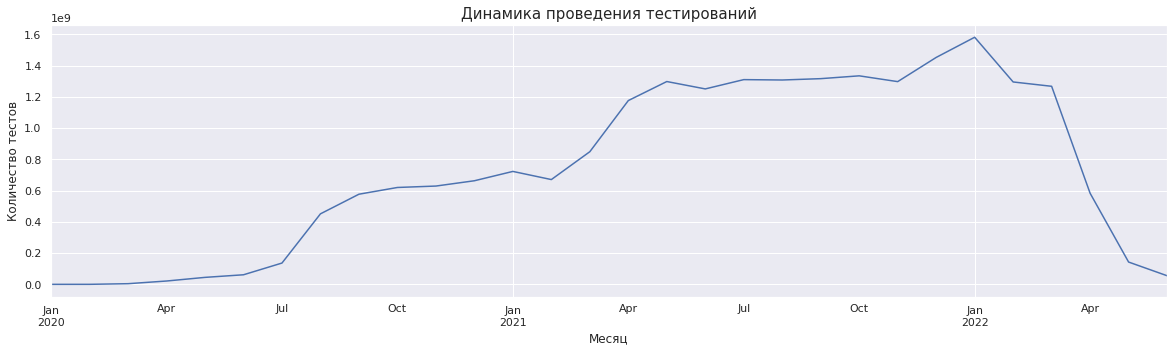

In [ ]:
df.groupby(['month'])['number_of_tests'].sum().plot(figsize=[20,5])
plt.title('Динамика проведения тестирований', fontsize=15)
plt.xlabel('Месяц')
plt.ylabel('Количество тестов')
plt.show()

- Очевидно, что самый пик заболеваемости случился в январе 2022г. 


- Также на графике четко прослеживаются волны болезни. До изобретения вакцинации тренд был восходящий, после появления вкацины он менялся - отчетливо видны 4 волны заболеваемости. 

- Пик вакцинации был в июле 2021. 

- Возможно, что пик заболеваемости в январе 2022 связан с тем, что тесты стали доступнее.

#### Влияние вакцинации на смертность от COVID-19

Посмотрим динамику случаев заболевания, смертности и доли вакцинированного населения.

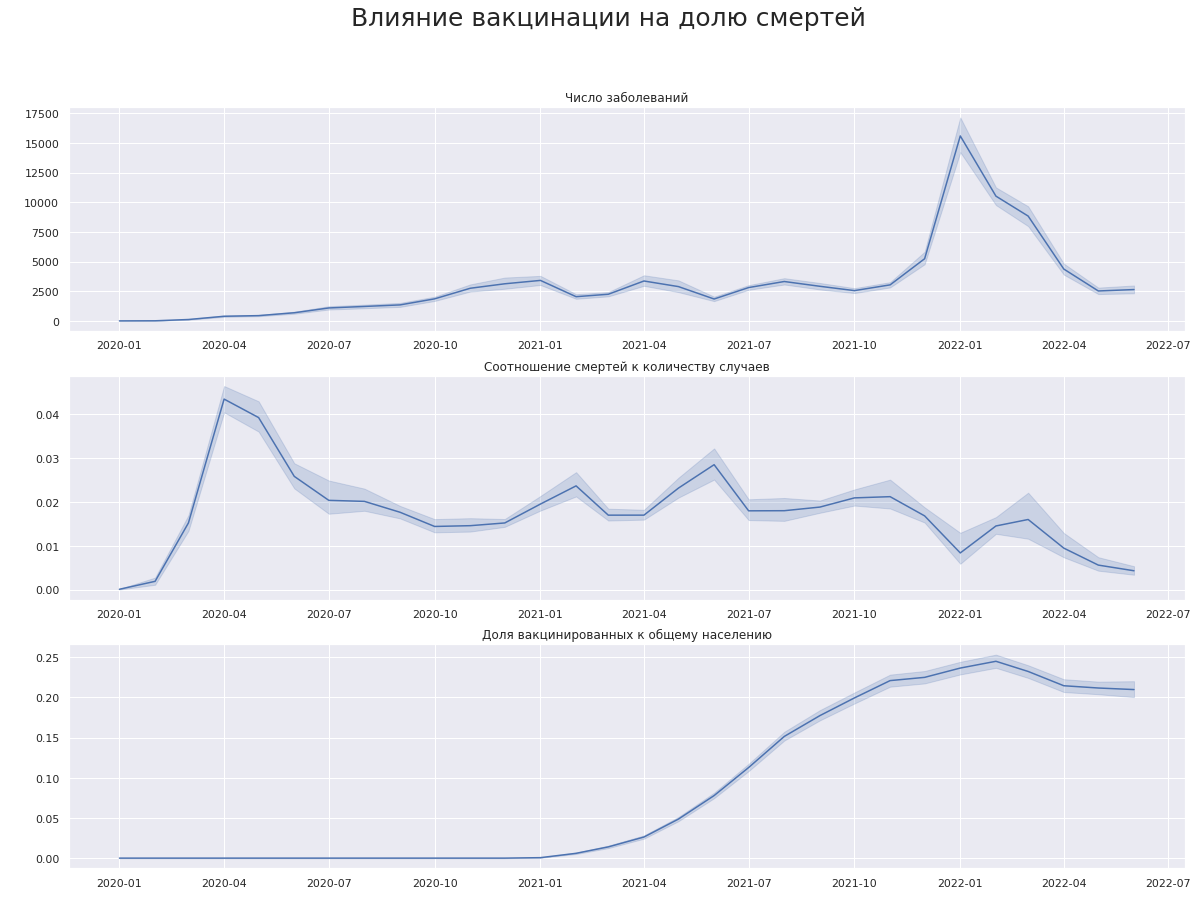

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20,14))
sns.lineplot(x=df.month, y=df.daily_cases, ax=ax[0])
sns.lineplot(x=df.month, y=df.deaths_to_cases, ax=ax[1])
sns.lineplot(x=df.month, y=df.vaccinated_share, ax=ax[2])
 
ax[0].set_title('Число заболеваний')  
ax[1].set_title('Соотношение смертей к количеству случаев')
ax[2].set_title('Доля вакцинированных к общему населению')
ax[0].set(xlabel=' ')
ax[1].set(xlabel=' ')
ax[2].set(xlabel=' ')
ax[0].set(ylabel=' ')
ax[1].set(ylabel=' ')
ax[2].set(ylabel=' ')

fig.suptitle('Влияние вакцинации на долю смертей', fontsize=25);

Вакцинация началась в конце 2020года и показывает возрастающий тренд. На пик заболеваемости в январе 2022 года приходится пик доли вакцинированных. В то же время смертность в этот момент находится в своем минимуме. Это может свидетельствовать о положительном влиянии вакцинации на летальность COVID-19.  

#### Взаимосвязь среднего возраста населения и уровня смертности

Посмотроим взаимосвязь среднего возраста в каждой стране и доли населения погибшего от вируса.

In [ ]:
age_deaths = df.groupby('country')[['deaths_to_population', 'med_age']].max().reset_index()
px.scatter(data_frame=age_deaths, x='med_age', y='deaths_to_population',hover_name='country', 
           title='Распределение смертности относительно среднего возраста населения', 
           labels={'med_age':'Средний возраст', 'deaths_to_population':'Уровень смертности'})


На графике хорошо видно что с увеличением среднего возраста увеличивается доля смертельных случаев.

#### Взаимосвязь заболеваемости и урбанизации

Сделаем сводную таблицу по каждой стране с общим числом случаев заболеваний, долей переболевшего населения и долей городского населения.

In [ ]:
urban_cases = df.groupby('country')[['cases_to_population', 'urban_rate', 'total_cases']].max().reset_index()
urban_cases.head()

,country,cases_to_population,urban_rate,total_cases
0,afghanistan,0.005,25.000,181912.000
1,albania,0.097,63.000,277940.000
2,algeria,0.006,73.000,266006.000
3,andorra,0.566,88.000,43774.000
4,angola,0.003,67.000,99761.000


Построим диаграмму рассеяния для каждой страны. Размер точек показывает общее число случаев заражения. 

In [ ]:
px.scatter(data_frame=urban_cases, x='urban_rate', y='cases_to_population',hover_name='country', size='total_cases',
           size_max=30, title='Распределение заболеваемости относительно уровня урбанизации', 
           labels={'urban_rate':'Уровень урбанизации', 'cases_to_population':'Уровень заболеваемости'})

С ростом урбанизации увеличивается доля заболевших. Исключение - Индия, вторая по населению страна в мире, но не сильно урбанизированная. 

#### Географическое распределение

Посмотрим на общие показатели по миру и построим карты распределения данных.

In [ ]:
cases_to_population_world = df.groupby('country')['total_cases'].max().sum() / df.groupby('country')['population_2020'].max().sum()
print(f'Процент населения планеты заразившаяся COVID-19:, {cases_to_population_world*100:.3f}%')

Процент населения планеты заразившаяся COVID-19:, 7.049%


In [ ]:
deaths_to_population_world = df.groupby('country')['total_deaths'].max().sum() / df.groupby('country')['population_2020'].max().sum()
print(f'Процент погибших от COVID-19: {(deaths_to_population_world*100):.3f}%')

Процент погибших от COVID-19: 0.082%


In [ ]:
world_map = df.groupby(['alpha_code', 'country'])['cases_to_population'].max().reset_index()
#world_map['log'] = world_map['total_cases'].apply(lambda x: np.log(x))

Доля заболевших

In [ ]:
fig = px.choropleth(world_map, locations='alpha_code',
                    color='cases_to_population',
                    hover_name='country',
                    color_continuous_scale="Viridis",
                    scope='world',
                    labels = {'cases_to_population':'Доля заболевшего населения страны'}
                    )

fig.show()

Посмотрим на Европу ближе

In [ ]:
fig = px.choropleth(world_map, locations='alpha_code',
                    color='cases_to_population',
                    hover_name='country',
                    color_continuous_scale="Viridis",
                    scope='europe',
                    labels = {'cases_to_population':'Доля заболевшего населения страны'}
                    )
fig.show()

Процент вакцинированных 

In [ ]:
df[df.vaccinated_share>.95]['country'].unique()

array(['brunei', 'gibraltar', 'malta', 'samoa', 'united arab emirates'],
      dtype=object)

In [ ]:
vaccinated_world = df.groupby(['alpha_code', 'country'])['vaccinated_share'].max().reset_index()

In [ ]:
fig = px.choropleth(vaccinated_world, locations='alpha_code',
                    color='vaccinated_share',
                    hover_name='country',
                    color_continuous_scale="RdYlGn",
                    scope='world',
                    labels = {'vaccinated_share':'Доля вакцинированного населения страны'}
                    )
fig.show()

In [ ]:
df[df.vaccinated_share>1]['country'].unique()

array(['gibraltar', 'malta'], dtype=object)

На картах наглядно видно, что наибольший уровень заболеваемости в Исландии и Дании. 

С вакцинацией хуже всего дела обстоят в Африке. Также, сильно выделяются Папуа и Новая Гвинея, Кыргыстан, Афганистан и Ирак.
Наибольший % вакцинированных в ОАЭ и Чили.


*Примечание: доля вакцинированных больше 1 сидетельствует о большом количестве нерезидентов*

# Рейтинг по странам 

### Заболеваемость

```
Тут вопрос: нужны ли сводники сами по себе или сделать сводник и барплот? Или можно просто барплот, но на нем показать все значения для наглядности? Три варианта на выбор))
```

Абсолютное количество случаев заражения

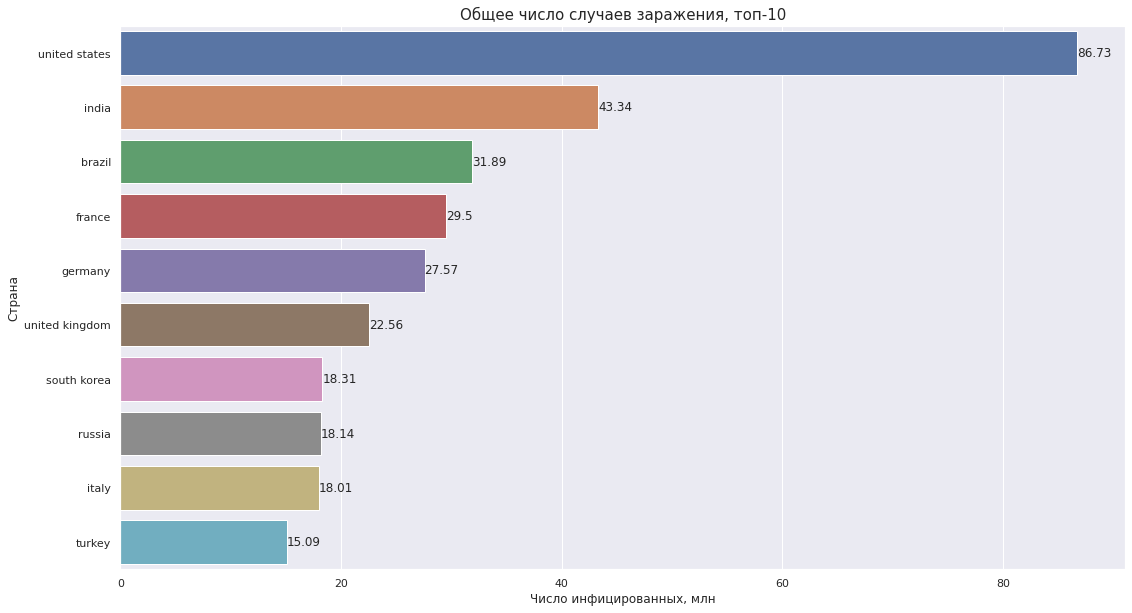

In [ ]:
cases = df.groupby('country')['total_cases'].max().sort_values(ascending=False).head(10).to_frame()
cases['total_cases'] = round((cases.total_cases / 1000000), 2)
ax = sns.barplot(data=cases.reset_index(), y='country',x='total_cases', orient='h')
plt.title('Общее число случаев заражения, топ-10', fontsize=15)
plt.xlabel('Число инфицированных, млн')
plt.ylabel('Страна')
ax.bar_label(ax.containers[0]);

Количество случаев в отношении к общей численности

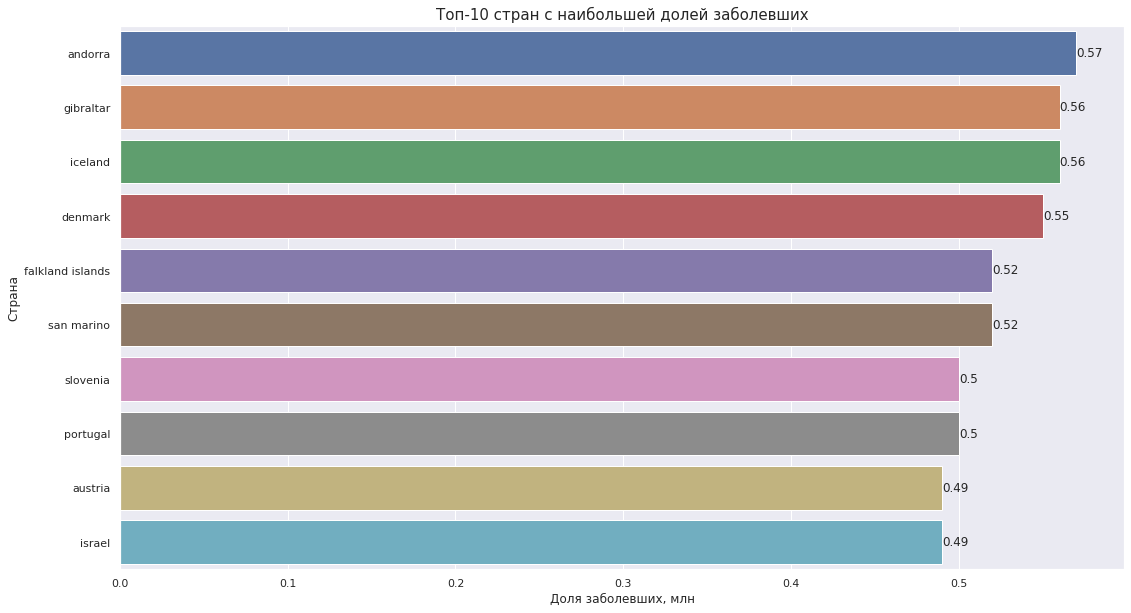

In [ ]:
cases_pop = df.groupby('country')['cases_to_population'].max().round(2).sort_values(ascending=False).head(10).to_frame()
cases_pop
ax = sns.barplot(data=cases_pop.reset_index(), y='country',x='cases_to_population', orient='h')
plt.title('Топ-10 стран с наибольшей долей заболевших', fontsize=15)
plt.xlabel('Доля заболевших, млн')
plt.ylabel('Страна')
ax.bar_label(ax.containers[0]);

Давайте посмотрим страны с большим населением. Для этого возьмем страны с населением больше медианного:

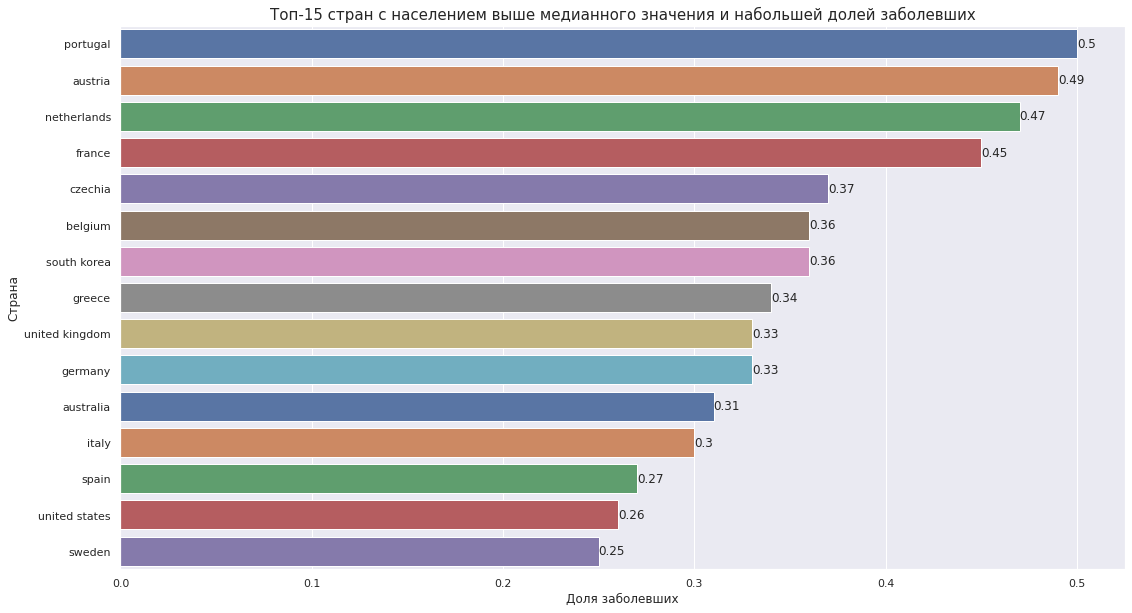

In [ ]:
cases_pop = df[df.population_2020>df.population_2020.median()].groupby('country')['cases_to_population'].max().round(2).sort_values(ascending=False).head(15).to_frame()
cases_pop
ax = sns.barplot(data=cases_pop.reset_index(), y='country',x='cases_to_population', orient='h', palette='deep')
plt.title('Топ-15 стран с населением выше медианного значения и набольшей долей заболевших', fontsize=15)
plt.xlabel('Доля заболевших')
plt.ylabel('Страна')
ax.bar_label(ax.containers[0]);

Рейтинг по абсолютным значениям заболеваемости не совпадает с рейтингом по доли заболевших от числа населения. Что логично, учитывая неравномерность распространения вируса. 
В топ-15 по доле заболевших больше всего вошло стран Евросоюза.

### Смертность

Общее количество смертей

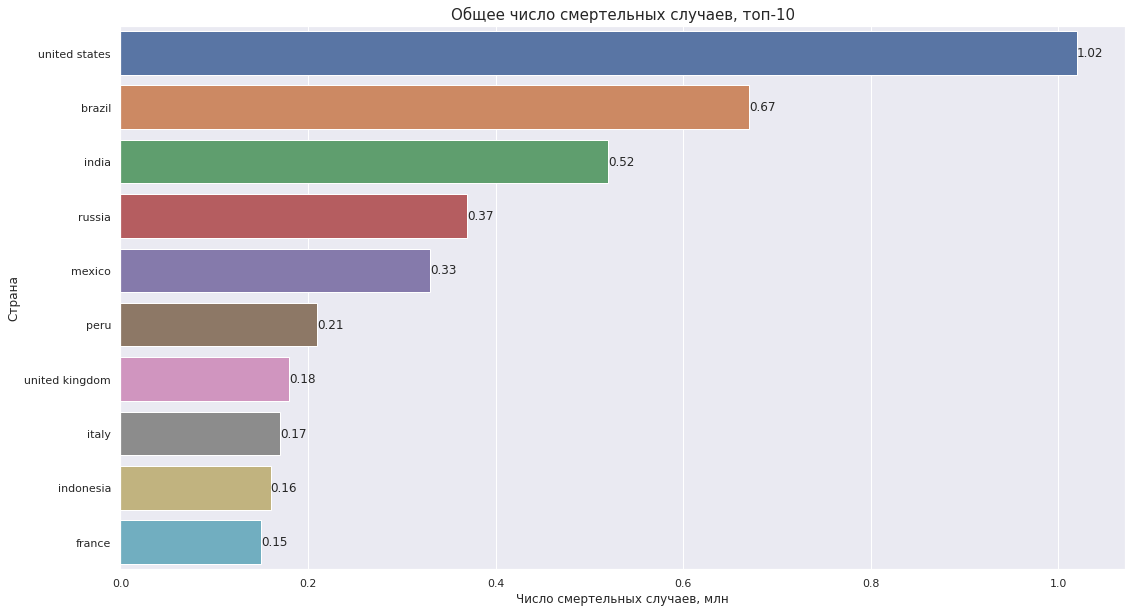

In [ ]:
deaths = df.groupby('country')['total_deaths'].max().sort_values(ascending=False).head(10).to_frame()
deaths['total_deaths'] = round((deaths.total_deaths / 1000000), 2)
ax = sns.barplot(data=deaths.reset_index(), y='country',x='total_deaths', orient='h')
plt.title('Общее число смертельных случаев, топ-10', fontsize=15)
plt.xlabel('Число смертельных случаев, млн')
plt.ylabel('Страна')
ax.bar_label(ax.containers[0]);

Лидером по абсолютному числу смертей, ожидаемо, стала страна-лидер по абсолютному количеству случаев заражения - США. Однако, данная взаимосвязь не так явно прослеживается среди остальных стран в топ-10, хотя 7 из 10 стран присутствуют в обоих рейтингах.

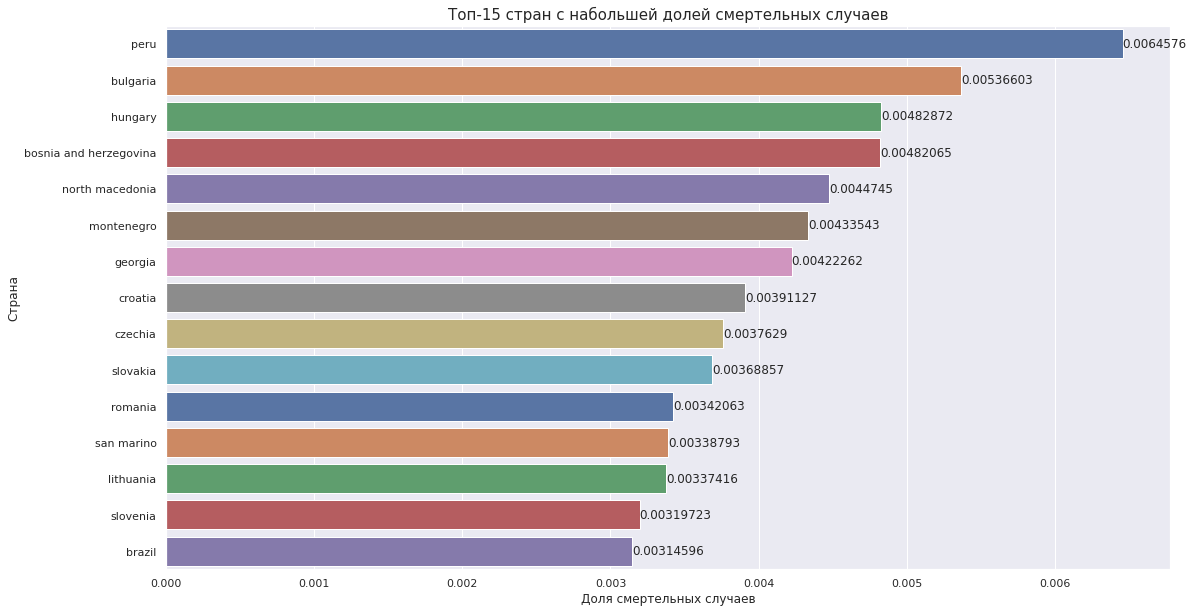

In [ ]:
deaths_pop = df.groupby('country')['deaths_to_population'].max().sort_values(ascending=False).head(15).to_frame()
ax = sns.barplot(data=deaths_pop.reset_index(), y='country',x='deaths_to_population', orient='h', palette='deep')
plt.title('Топ-15 стран с набольшей долей смертельных случаев', fontsize=15)
plt.xlabel('Доля смертельных случаев')
plt.ylabel('Страна')
ax.bar_label(ax.containers[0]);

Как и в случае с рейтингами по заболеваемости, в рейтинги по абсолютным и относительным показателям смертности не совпадают. Это можно объяснить разницей плотности населений стран, и уровня медицины.

### Вакцинация

Процент вакцинированного населения

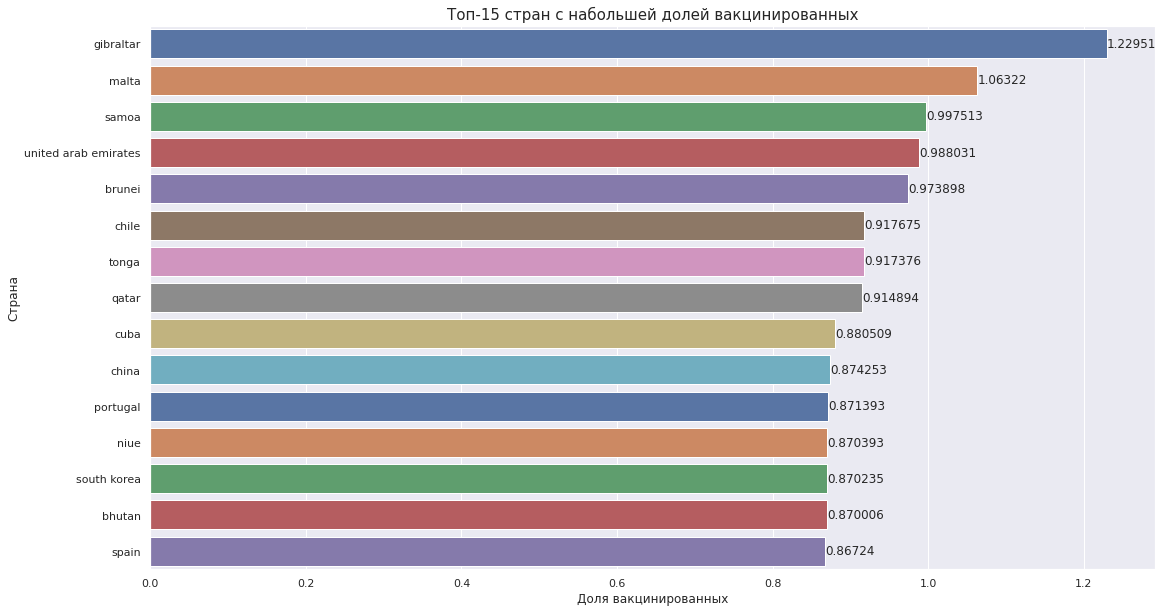

In [ ]:
vacc_pop = df.groupby('country')['vaccinated_share'].max().sort_values(ascending=False).head(15).to_frame()
ax = sns.barplot(data=vacc_pop.reset_index(), y='country',x='vaccinated_share', orient='h', palette='deep')
plt.title('Топ-15 стран с набольшей долей вакцинированных', fontsize=15)
plt.xlabel('Доля вакцинированных')
plt.ylabel('Страна')
ax.bar_label(ax.containers[0]);

Из графика видно, что наибольшая доля вакцинированного населения в небольших странах.

Дополнительно посмотрим на страны с населением выше медианного значения.

*Примечание: доля вакцинированных больше 1 сидетельствует о большом количестве нерезидентов*

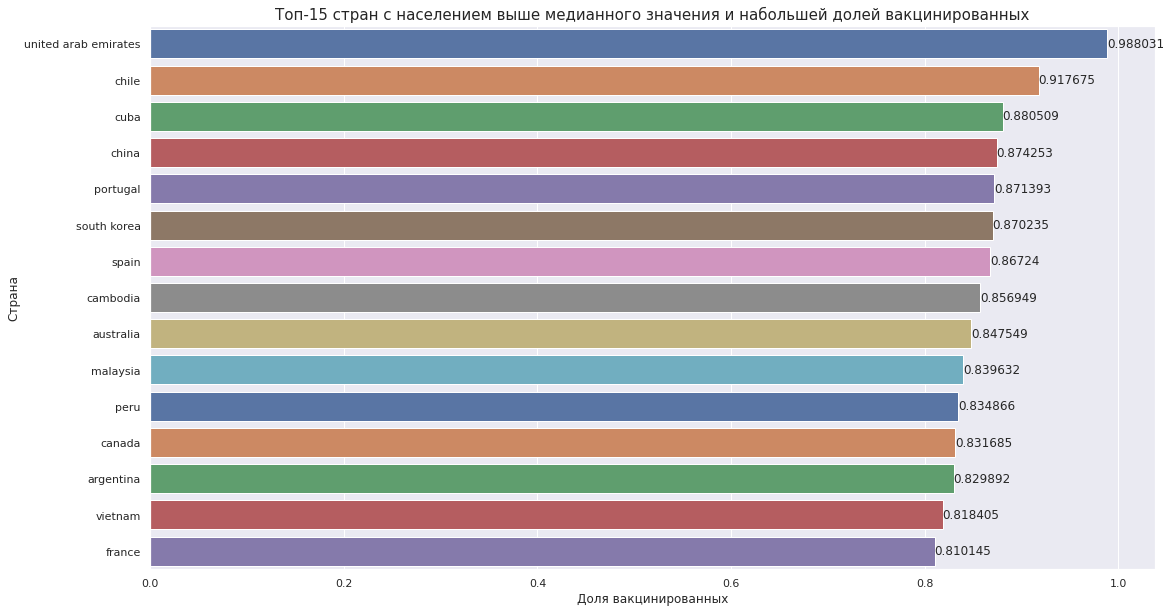

In [ ]:
vacc_pop = df[df.population_2020 > df.population_2020.median()].groupby('country')['vaccinated_share']\
                                    .max().sort_values(ascending=False).head(15).to_frame()
ax = sns.barplot(data=vacc_pop.reset_index(), y='country',x='vaccinated_share', orient='h', palette='deep')
plt.title('Топ-15 стран с населением выше медианного значения и набольшей долей вакцинированных', fontsize=15)
plt.xlabel('Доля вакцинированных')
plt.ylabel('Страна')
ax.bar_label(ax.containers[0]);

Из графика видно, что страны, наболее пострадавшие от ковида, не являются лидерами по доле вакцинацинированных. 

# Общий вывод:

- На основе проведенной работы мы выяснили, что всего в мире переболело 7% населения, а погибло 0.082% населения.


- Пик заболеваемсти не совпал с пиком смертельных случаев, что говорит о том, что вакцинация улучшила ситуацию, сократив количество смертей. Однако, она не повлияла на ситуацию с заболеванием в целом, о чем свидетельствует пик заболеваемости в январе 2022.


- Действительно, чем выше средний возраст населения, тем выше доля смертных случаев в стране.


- В наиболее урбанизированных странах, количество заболевших значительно выше, однако, есть исключия - Индия и Вьетнам.

- Также, страны, наболее пострадавшие от ковида, не являются лидерами по доле вакцинацинированных. 


# Бонус 1: Сводные графики по странам

Для более детального анализа по стране, можно воспользоваться функцией country_stats

In [ ]:
def country_stats(country):
  data = df[df.country==country]
  fig, ax = plt.subplots(3, 2, figsize=(20,14))
  sns.lineplot(x=data.month, y=data.daily_cases, ax=ax[0,0])
  sns.lineplot(x=data.month, y=data.number_of_tests, ax=ax[0,1])
  sns.lineplot(x=data.month, y=data.deaths_to_cases, ax=ax[1,0])
  sns.lineplot(x=data.month, y=data.cases_to_tests, ax=ax[1,1])
  sns.lineplot(x=data.month, y=data.vaccinated_share, ax=ax[2,0])
  sns.lineplot(x=data.month, y=data.cases_to_population, ax=ax[2,1])
  ax[0,0].set_title('Число случаев')  
  ax[0,1].set_title('Количество тестов')
  ax[1,0].set_title('Соотношение смертей к количеству случаев')
  ax[1,1].set_title('Количество случаев к тестам')
  ax[2,0].set_title('Доля вакцинированных к общему населению')
  ax[2,1].set_title('Доля переболевшего населения')
  ax[0,0].set(xlabel='')
  ax[0,1].set(xlabel='')
  ax[1,0].set(xlabel='')
  ax[1,1].set(xlabel='')
  ax[2,0].set(xlabel='')
  ax[2,1].set(xlabel='')
  fig.suptitle(country, fontsize=25);
  fig.text(0.1,1,f'Переболевших:       {data.cases_to_population.max()*100:.1f}%')
  fig.text(0.1,0.985,f'Погибших:               {data.deaths_to_population.max()*100:.1f}%')
  fig.text(0.1,0.97,f'Вакцинированных: {data.vaccinated_share.max()*100:.1f}%')
  #fig.text(0.1,0.97,f'Процент вакцинированных: {data.vaccinated_share.max()*100:.1f}%')
  fig.show()



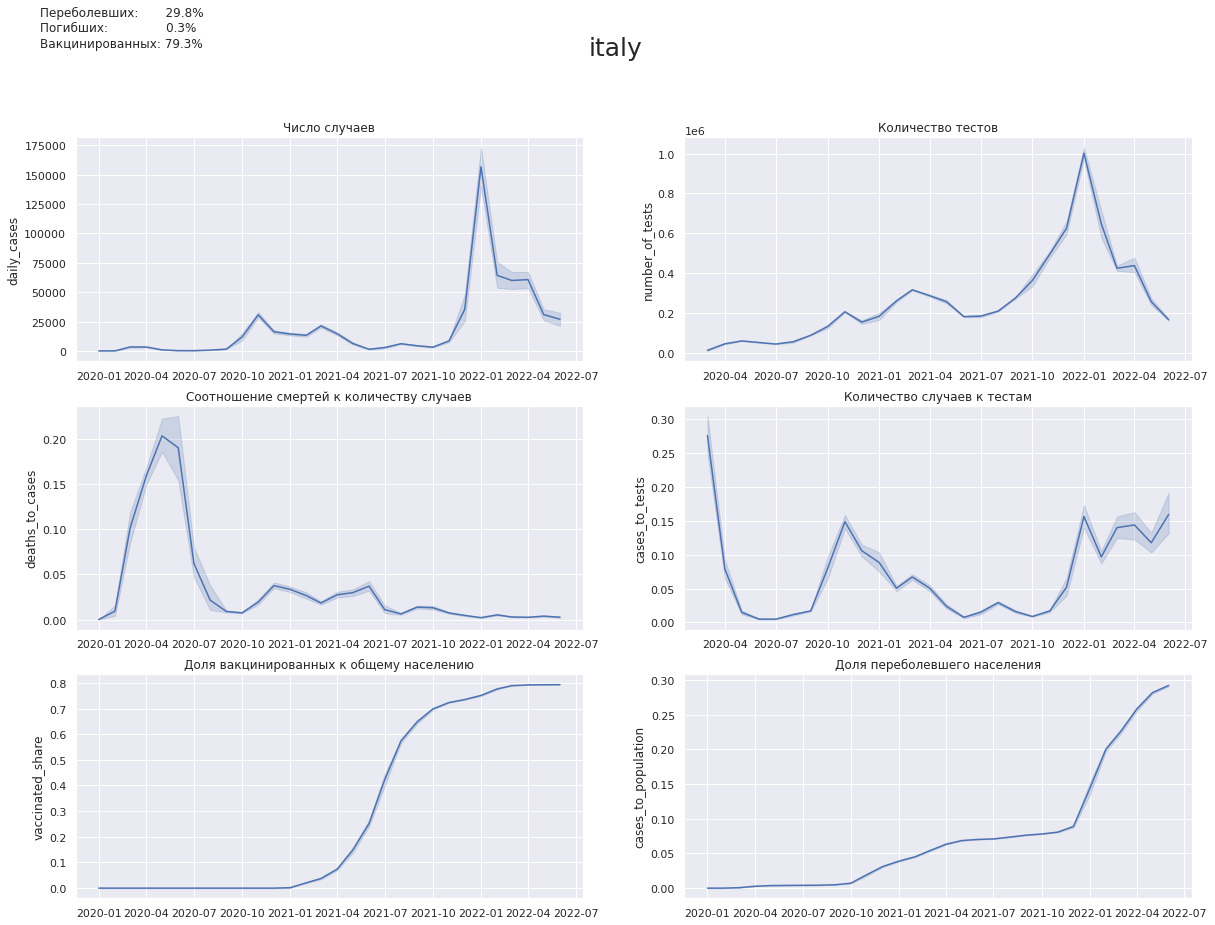

In [ ]:
country_stats('italy')

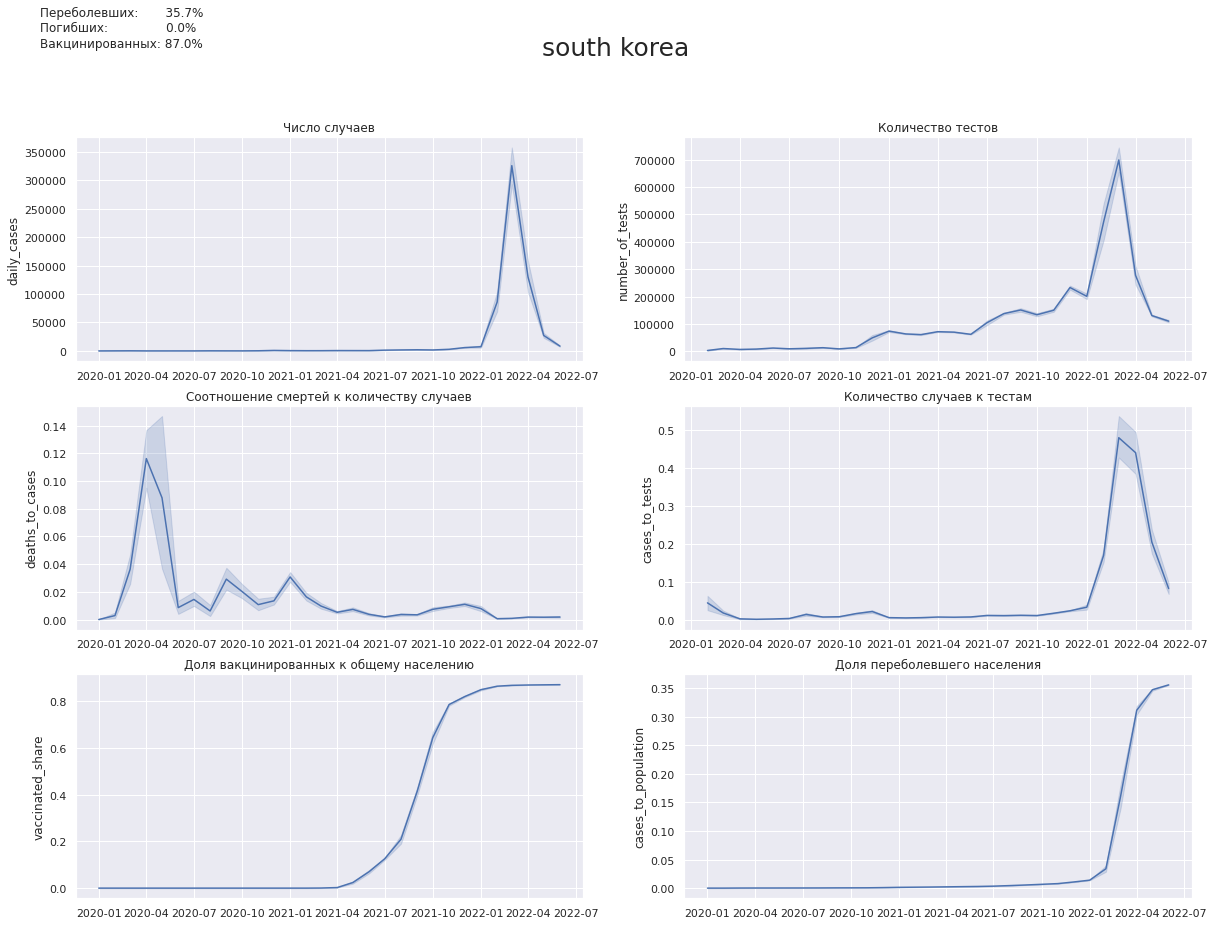

In [ ]:
country_stats('south korea')

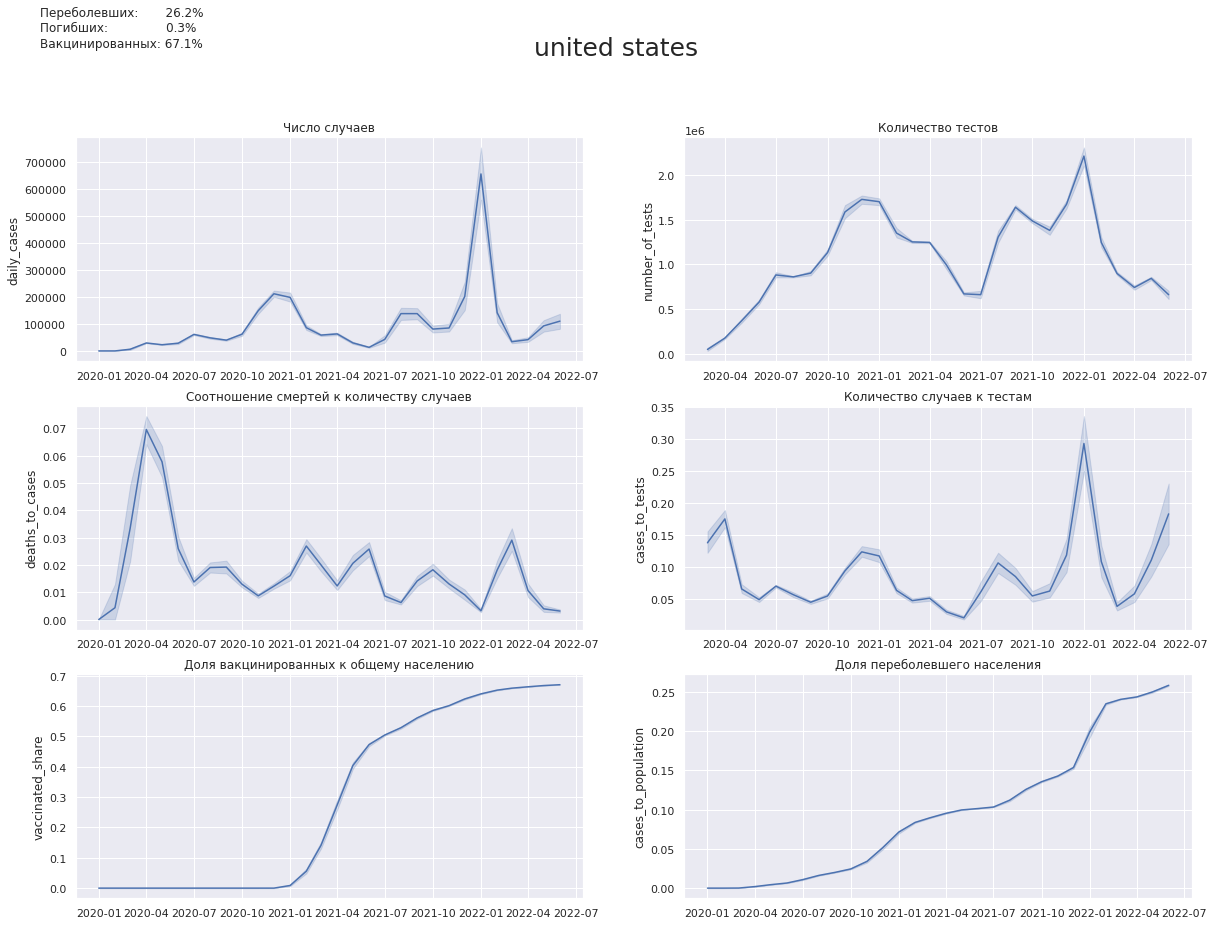

In [ ]:
country_stats('united states')

# Бонус 2: Race Bar Chart

Динамика заболеваний в мире по месяцам за весь период


In [ ]:
pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 4.8 MB/s 


In [ ]:
temp = pd.crosstab(index=df['month'], columns=df['country'], values=df['total_cases'], aggfunc='max')
import bar_chart_race as bcr
import warnings
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
bcr.bar_chart_race(df=temp,
                   n_bars=10,
                   orientation="h",
                   title="Динамика COVID-19 в мире по месяцам",
                   cmap="tab20b")